In [6]:
# [Ian, Noriega]
# [10145657]
# [MMA]
# [2021W]
# [MMA869]
# [August 16th, 2020]

# Answer to Question 1, Part 1

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [3]:
# Read in data from Uncle Steve's GitHub repository
customers = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")

# EDA

In [4]:
# TODO: insert code here to perform the given task. Don't forget to document your code!

In [5]:
#shape of df
print(customers.shape)
#preview the df
customers.head()
#observations: we have 4 features to evaluate

(505, 4)


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [6]:
customers.info()
#observations: no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [7]:
#summary statistics
customers.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [8]:
import pandas_profiling

In [9]:
#cool profiling report
pandas_profiling.ProfileReport(customers)

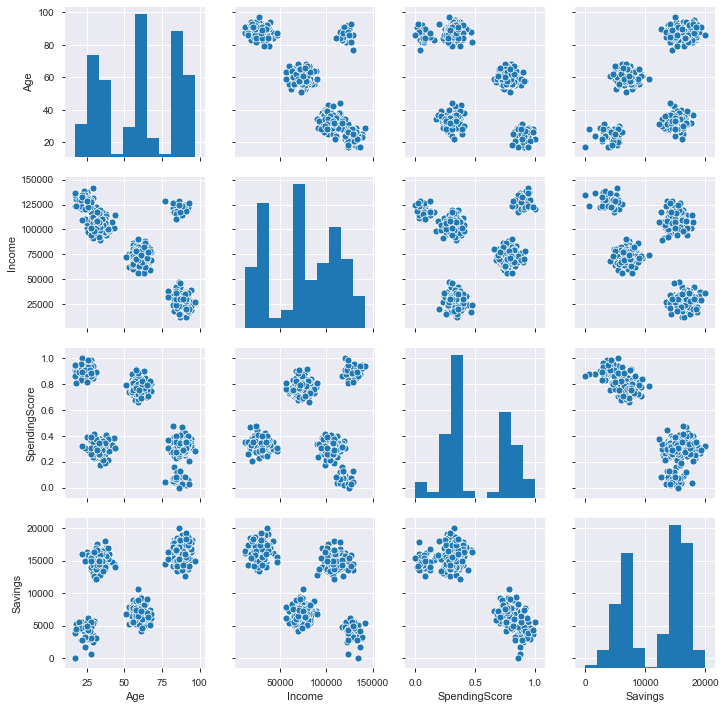

In [10]:
#examine pairs
sns.pairplot(customers)
#observations: we make a few early observations here - the distribution of age
#in our df appears trimodal while income, spending score, and savings all
#look to have bimodal distributions; we also notice some evident clusters that
#are apparent in the pairwise scatter plots

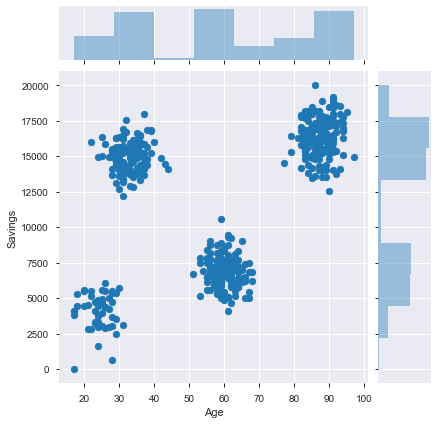

In [11]:
#example of interpreting a paired comparison - savings by age
sns.jointplot(x='Age',y='Savings',data=customers)
#observations: we have 4 clearly defined clusters here - bottom left and top right
#clusters are somewhat expected (young with less savings, old with more savings);
#top left are over-achievers (young but high savings) while bottom middle-right
#are somewhat "disappointers" (middle-aged but no significant savings)

# Standardize the Data

In [12]:
#use standardscaler
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
#fit and transform our features to a scaled version
scaled_features = scaler.fit_transform(customers)

In [15]:
scaled_features

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

In [16]:
#convert back to pandas df
customers_scaled = pd.DataFrame(scaled_features,columns=customers.columns)

In [17]:
#preview our scaled features
customers_scaled

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452


# K-Means

In [18]:
#import KMeans algorithm
from sklearn.cluster import KMeans

In [37]:
#let's arbitrarily select K = 4 here
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=1024)

In [38]:
#fit to our data
kmeans.fit(customers_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1024, tol=0.0001, verbose=0)

In [39]:
#view the cluster labels our K-Means generated
kmeans.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 0, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 0, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [40]:
#cluster centroids
kmeans.cluster_centers_
#observations: we see the coordinates of our 4 (K) clusters

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [41]:
#to get a legit k value to use, let's use the elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customers_scaled)
    distortions.append(kmeanModel.inertia_)

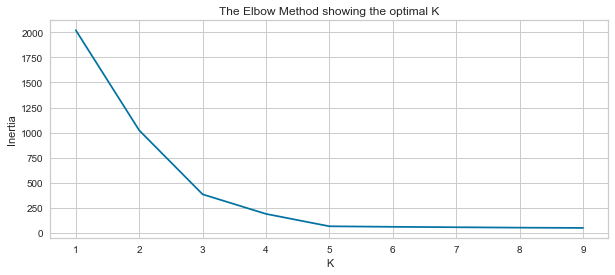

In [42]:
#view our elbow plot
plt.figure(figsize=(10,4))
plt.plot(K, distortions)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()
#observations: we initially picked 4, however it looks as though K=5 could
#net more accurate results

In [43]:
#let's confirm this suspicion by taking a look at the silhouette values for
#K=4 and K=5
from sklearn.metrics import silhouette_score

silhouette_score(customers_scaled, kmeans.labels_)

#observations: silhouette coefficient of 0.76 indicates strong accuracy
#in terms of identifying instances in their proper clusters (close to centroids)
#...however let's try the K-Means with K=5, as suggested by the elbow method

0.7581191889903789

In [157]:
#now let's try with k=5
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=1024)
kmeans.fit(customers_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1024, tol=0.0001, verbose=0)

In [158]:
#check silhouette score for expected improvement
silhouette_score(customers_scaled, kmeans.labels_)
#observations: we see silhouette coefficient increase to 0.80! now we are
#confident our with K = 5 clusters

0.8048976287755765

In [46]:
#view the cluster labels our K-Means generated
print(kmeans.labels_)
#5 cluster centroids (using inverse scaling for more relevance)
scaler.inverse_transform(kmeans.cluster_centers_)

[1 1 1 1 2 3 1 2 2 2 4 0 0 0 1 4 1 2 2 4 0 4 1 2 4 3 3 1 2 1 1 1 2 1 0 1 2
 1 0 0 1 2 3 1 1 3 4 3 0 1 2 0 3 2 1 2 0 2 2 2 2 2 2 1 1 1 2 3 3 1 1 0 2 2
 0 1 0 1 1 3 1 4 1 2 2 0 0 1 1 1 1 1 3 2 1 3 0 1 1 0 0 3 0 3 0 2 2 0 0 1 2
 0 1 0 0 0 1 0 3 2 0 2 2 2 0 4 1 2 1 1 0 1 0 1 3 2 4 3 1 0 2 1 1 3 1 3 1 4
 1 2 1 0 2 1 2 4 0 1 2 1 0 2 1 0 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2 1 1 0 3 3
 2 0 1 1 1 0 2 1 1 1 2 3 0 2 2 2 0 1 0 1 0 1 2 3 1 2 2 2 2 1 2 0 3 0 2 1 1
 0 2 0 3 0 1 1 2 1 1 2 1 1 1 0 1 0 0 3 1 1 1 4 1 0 2 3 3 3 2 1 0 2 2 0 0 1
 1 4 1 1 2 1 2 0 3 1 0 2 1 2 2 0 1 2 2 1 1 2 0 0 4 0 2 2 0 4 2 2 3 1 0 0 1
 0 2 2 0 1 0 2 1 0 3 1 2 0 0 2 4 4 1 2 0 1 1 2 0 2 0 2 0 2 2 0 2 0 1 0 1 1
 0 0 2 2 3 3 0 2 3 2 4 1 1 1 2 2 0 0 4 0 4 1 0 3 2 1 2 3 1 2 2 1 2 0 1 4 0
 0 1 2 2 2 2 2 0 0 2 1 0 1 4 2 2 1 2 2 1 2 2 0 2 1 0 3 0 1 2 0 1 1 1 2 0 3
 0 1 0 1 1 3 0 4 3 0 0 2 1 2 0 2 0 1 1 2 4 0 2 0 1 1 0 1 2 1 0 1 2 1 2 3 0
 0 3 0 0 2 2 1 3 1 0 0 4 3 0 3 2 0 0 1 0 2 2 3 1 0 1 1 0 1 1 1 2 0 0 1 1 1
 2 0 2 2 2 2 3 2 2 2 1 1 

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

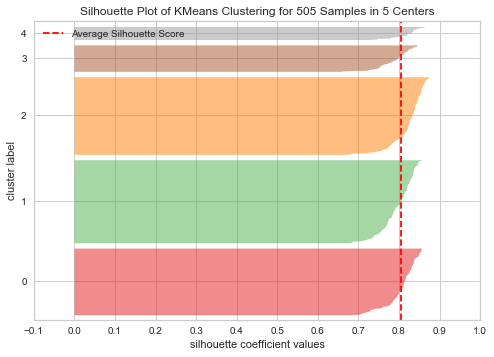

In [47]:
#view silhouette diagram for out K-Means clustering with K = 5
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(customers_scaled)
visualizer.poof()
fig = visualizer.ax.get_figure()

#observations: instances in each cluster are beating the silhouette score;
#strong performance

# DBSCAN

In [48]:
#import DBSCAN algorithm
from sklearn.cluster import DBSCAN

In [49]:
#set epsilon to 0.3 and min_samples to 3 to begin
dbscan = DBSCAN(eps=0.3, min_samples=3)

In [50]:
#fit the algorithm to our data
dbscan.fit(customers_scaled)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [51]:
#view the generated cluster labels
dbscan.labels_
#observations: DBSCAN has decided to assign 5 clusters (0,1,2,3,4)

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [52]:
#check silhouette score
silhouette_score(customers_scaled, dbscan.labels_)
#observations: silhouette coefficient of 0.77 is quite strong...

0.7679653694292776

In [53]:
#let's try to better tune our parameters - epsilon:
silhouettes = {}
for eps in np.arange(0.1, 1.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=3).fit(customers_scaled)
    silhouettes[eps] = silhouette_score(customers_scaled, dbscan.labels_, metric='euclidean')

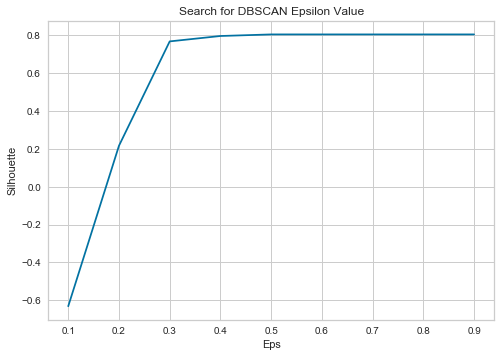

In [54]:
#silhouette plot for DBSCAN epsilon value
plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('Search for DBSCAN Epsilon Value')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid(True);

#observations: setting eps = 0.5 looks like the best choice here

In [55]:
#let's also explore min_samples (recall guidelines: >=3 and ~ #features*2?)
silhouettes = {}
for min_samples in range(1,10):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples).fit(customers_scaled)
    silhouettes[min_samples] = silhouette_score(customers_scaled, dbscan.labels_, metric='euclidean')

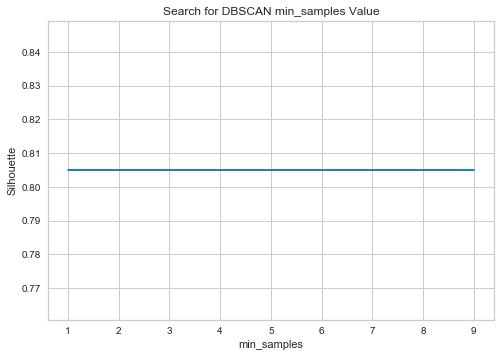

In [56]:
#silhouette plot for DBSCAN min_samples value
plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('Search for DBSCAN min_samples Value')
plt.xlabel("min_samples");
plt.ylabel("Silhouette");
plt.grid(True);

#observations: looks like there's no difference...we'll keep it at the safe
#standard of min_samples = 3

In [57]:
#let's re-run DBSCAN with eps = 0.5
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(customers_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [58]:
#view the generated cluster labels
dbscan.labels_
#observations: remains assigning 5 clusters

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

In [59]:
#check silhouette score
silhouette_score(customers_scaled, dbscan.labels_)
#observations: silhouette coefficient now increases to 0.80; very good!

0.8048976287755765

# Hierarchical (Agglomerative)

In [60]:
#import hierarchical algorithm (scikitlearn doesn't have...use scipy)
from sklearn.cluster import AgglomerativeClustering

In [69]:
#fit the algorithm; setting clusters to 5 since we know it's optimal from both
#K-Means and DBSCAN; set linkage to ward (prof recommends) and euclidean distance
h_agg = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
h_agg.fit(customers_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [70]:
#get cluster assignments for each instance
h_agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [71]:
#check silhouette score
silhouette_score(customers_scaled, h_agg.labels_)
#observations: silhouette coefficient is 0.8 again; strong!

0.8048976287755765

In [81]:
#generate dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
h_aggl = linkage(customers_scaled, method='ward', metric='euclidean')

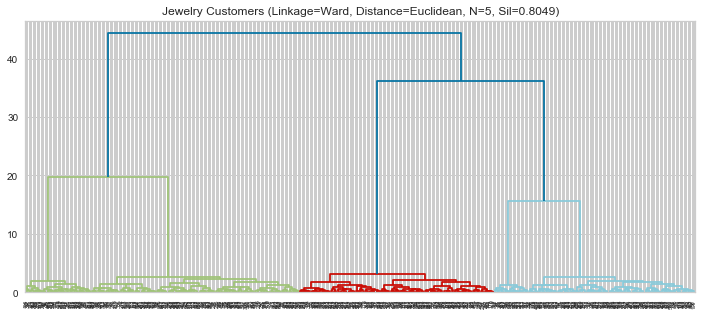

In [82]:
plt.figure(figsize=(12, 5))
plt.title("Jewelry Customers (Linkage=Ward, Distance=Euclidean, N=5, Sil=0.8049)")  
dend = dendrogram(h_aggl)

# Cluster Interpretation

In [433]:
#After exploring 3 of the primary clustering algorithms, we'll go ahead with
#K-Means due to its interpretability (all 3 performed similarly)

In [86]:
#revisit K-Means clustering labels
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [84]:
#view algorithm parameters (recall we set K=5 after using elbow method to
#evaluate different levels of K in terms of inertia and silhouette score
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1024, tol=0.0001, verbose=0)>

In [131]:
#examine feature means for each of our 5 clusters
means = np.zeros((5, customers_scaled.shape[1])) #create empty matrix

for i, label in enumerate(set(cluster_labels)):
    means[i,:] = customers_scaled[cluster_labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(cluster_labels==label)))
    print(scaler.inverse_transform(means[i,:])) #reverse the prior standardization for interpretable results r
    
means


Cluster 0 (n=126):
[3.27777778e+01 1.05265810e+05 3.09926130e-01 1.49627781e+04]

Cluster 1 (n=157):
[5.99554140e+01 7.24480637e+04 7.71518368e-01 6.88997219e+03]

Cluster 2 (n=147):
[8.77755102e+01 2.78661020e+04 3.28800461e-01 1.66592614e+04]

Cluster 3 (n=50):
[2.41800000e+01 1.28029120e+05 8.96891640e-01 4.08752031e+03]

Cluster 4 (n=25):
[8.60000000e+01 1.19944040e+05 6.83780993e-02 1.48086838e+04]


array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [132]:
#view the first 5 customers (unscaled) to see if they are roughly matching up
#with the cluster means generated above - we know from K-Means that the first
#4 instances have been placed in cluster 1, and the 5th in cluster 2

customers.head()

#observations: first 4 instances are all roughly the same age (59ish) and
#similar income (76kish) - cluster 1 has mean age of 5.99+01 and income of
#7.244+04...looks legit!! 5th instance is a very old person with lots of
#savings - cluster 2 has a mean age of 8.77+01 and savings of 1.66+04...looks
#legit again!

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [133]:
#examine summary statistics for each cluster
from scipy import stats

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=customers_scaled.columns)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance']
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(customers_scaled.shape[0]))
d = stats.describe(customers_scaled, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(cluster_labels)):
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(sum(cluster_labels==label)))
    d = stats.describe(customers_scaled[cluster_labels==label], axis=0)
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance
Age,17.0,59.019802,97.0,83.183781
Income,12000.0,75513.291089,142000.0,111541.902843
SpendingScore,0.0,0.505083,1.0,0.764974
Savings,0.0,11862.455867,20000.0,16816.592636



Cluster 0:
Number of Instances: 126


,Min,Mean,Max,Variance
Age,22.000000,32.777778,44.000000,59.616176
Income,89598.000000,105265.809524,119877.000000,76541.566122
SpendingScore,0.174120,0.309926,0.411112,0.513069
Savings,12207.526078,14962.778066,17968.553929,12090.450337



Cluster 1:
Number of Instances: 157


,Min,Mean,Max,Variance
Age,51.000000,59.955414,68.000000,59.492591
Income,56321.000000,72448.063694,90422.000000,76596.266720
SpendingScore,0.657314,0.771518,0.910417,0.513261
Savings,4077.658657,6889.972190,10547.775368,12086.406592



Cluster 2:
Number of Instances: 147


,Min,Mean,Max,Variance
Age,79.000000,87.775510,97.00000,59.530343
Income,12000.000000,27866.102041,46977.00000,76669.860942
SpendingScore,0.203140,0.328800,0.47355,0.512968
Savings,13470.970605,16659.261445,20000.00000,12145.912313



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance
Age,17.000000,24.180000,31.000000,59.576107
Income,117108.000000,128029.120000,142000.000000,76413.349353
SpendingScore,0.806553,0.896892,1.000000,0.512367
Savings,0.000000,4087.520309,6089.478323,12192.664096



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance
Age,77.000000,86.000000,93.000000,59.576138
Income,110582.000000,119944.040000,128596.000000,76192.263624
SpendingScore,0.000000,0.068378,0.155694,0.511173
Savings,12554.692742,14808.683793,17833.093470,12134.296404


In [134]:
#Grab an exemplar from each cluster
from scipy.spatial import distance

for i, label in enumerate(set(cluster_labels)):
    customers_scaled_tmp = customers_scaled
    exemplar = distance.cdist([means[i]], customers_scaled).argmin()
    
    print('\nCluster {}:'.format(label))
    display(customers.iloc[[exemplar]])


Cluster 0:


,Age,Income,SpendingScore,Savings
405,34,103204,0.301087,15149.810421



Cluster 1:


,Age,Income,SpendingScore,Savings
467,61,72027,0.762325,6926.123598



Cluster 2:


,Age,Income,SpendingScore,Savings
335,89,26940,0.326005,16555.159377



Cluster 3:


,Age,Income,SpendingScore,Savings
95,25,130934,0.913766,3942.389134



Cluster 4:


,Age,Income,SpendingScore,Savings
155,86,115689,0.057843,14803.153273
